<a href="https://colab.research.google.com/github/Kamal0628/Kamal_january_training/blob/main/TEST_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP 1: IMPORT LIBRARIES

In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

STEP 2: LOAD DATASET

In [49]:
df = pd.read_csv('/content/sample_dataset_2000.csv')
df.head()

,ID,Age,Salary,Experience_Years,Department,Performance_Score
0,1,56,116520,4,IT,5
1,2,46,76272,28,Operations,10
2,3,32,107152,27,IT,10
3,4,60,82649,10,Operations,10
4,5,25,79674,0,IT,8


STEP 3: BASIC DATA UNDERSTANDING

In [50]:
df.isnull().sum()

,0
ID,0
Age,0
Salary,0
Experience_Years,0
Department,0
Performance_Score,0


STEP 4: DATA PREPROCESSING


4.1 Handling Missing Values

In [51]:
df.isnull().sum()

,0
ID,0
Age,0
Salary,0
Experience_Years,0
Department,0
Performance_Score,0


4.2 Removing Duplicate Records

In [52]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

4.3 Fixing Wrong Data Types

In [53]:
df.dtypes

,0
ID,int64
Age,int64
Salary,int64
Experience_Years,int64
Department,object
Performance_Score,int64


4.4 Handling Categorical Variables (Encoding)

In [54]:
le = LabelEncoder()
df['Department'] = le.fit_transform(df['Department'])

4.5 Detecting & Treating Outliers

In [55]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

4.6 Removing Irrelevant Features

In [56]:
df.drop('ID', axis=1, inplace=True)

4.7 Feature & Target Split

In [57]:
X = df.drop('Performance_Score', axis=1)
y = df['Performance_Score']

4.9 Feature Scaling (MANDATORY)

In [58]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

STEP 5: MODEL TRAINING & EVALUATION

In [59]:
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Performance")
    print("R2 Score :", r2)
    print("MSE      :", mse)
    print("RMSE     :", rmse)
    print("MAE      :", mae)
    print("-" * 40)

5.1 Linear Regression

In [60]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
evaluate_model(y_test, y_pred_lr, "Linear Regression")

Linear Regression Performance
R2 Score : -0.0011800144502953636
MSE      : 8.200108591979332
RMSE     : 2.863583173574557
MAE      : 2.485105281631489
----------------------------------------


5.2 Decision Tree Regressor

In [61]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
evaluate_model(y_test, y_pred_dt, "Decision Tree")

Decision Tree Performance
R2 Score : -1.148845720355506
MSE      : 17.6
RMSE     : 4.1952353926806065
MAE      : 3.425
----------------------------------------


5.3 Random Forest Regressor

In [62]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
evaluate_model(y_test, y_pred_rf, "Random Forest")

Random Forest Performance
R2 Score : -0.13099574122586488
MSE      : 9.263357000000001
RMSE     : 3.043576350282674
MAE      : 2.6014999999999997
----------------------------------------


5.4 K-Nearest Neighbors (KNN)

In [63]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
evaluate_model(y_test, y_pred_knn, "KNN")

KNN Performance
R2 Score : -0.2037687213223338
MSE      : 9.8594
RMSE     : 3.1399681527047374
MAE      : 2.674
----------------------------------------


5.5 Support Vector Machine (SVM)

In [64]:
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
evaluate_model(y_test, y_pred_svm, "SVM")

SVM Performance
R2 Score : -0.06153565702849373
MSE      : 8.69444808751117
RMSE     : 2.948634953247209
MAE      : 2.5372816712205073
----------------------------------------


STEP 6: MODEL COMPARISON

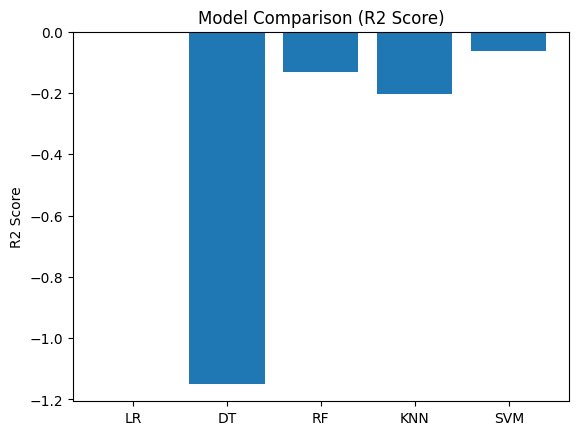

In [65]:
models = ['LR', 'DT', 'RF', 'KNN', 'SVM']
r2_scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_dt),
    r2_score(y_test, y_pred_rf),
    r2_score(y_test, y_pred_knn),
    r2_score(y_test, y_pred_svm)
]

plt.bar(models, r2_scores)
plt.title("Model Comparison (R2 Score)")
plt.ylabel("R2 Score")
plt.show()